### Using DataAnnotations attributes for validation

In [ ]:
using System.ComponentModel.DataAnnotations;

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

app.MapPost("/users", (UserModel user) => user.ToString()); 

app.Run();


public record UserModel
{
    [Required]
    [StringLength(100)]
    [Display(Name = "Your name")]
    public string FirstName { get; set; }
    [Required]
    [StringLength(100)]
    [Display(Name = "Last name")]
    public string LastName { get; set; }
    [Required]
    [EmailAddress]
    public string Email { get; set; }
    [Phone]
    [Display(Name = "Phone number")]
    public string PhoneNumber { get; set; }
}

- [`CreditCard`]—Validates that a property has a valid credit card format  
  
- [`EmailAddress`]—Validates that a property has a valid email address format
- [`StringLength(max)`]—Validates that a string has at most max number of characters
- [`MinLength(min)`]—Validates that a collection has at least the min number of items
- [`Phone`]—Validates that a property has a valid phone number format
- [`Range(min, max)`]—Validates that a property has a value between min and max
- [`RegularExpression(regex)`]—Validates that a property conforms to the regex regular expression pattern
- [`Url`]—Validates that a property has a valid URL format
- [`Required`]—Indicates that the property must not be null
- [`Compare`]—Allows you to confirm that two properties have the same value (such as Email and ConfirmEmail)

If you need to ****validation between multi property****, you can implement `IValidatableObject` 

In [ ]:
using System.ComponentModel.DataAnnotations;

public record CreateUserModel : IValidatableObject
{
    [EmailAddress]
    public string Email { get; set; }

    [Phone]
    public string PhoneNumber { get; set; }

    public IEnumerable<ValidationResult> Validate(
                        ValidationContext validationContext)
    {
        if (string.IsNullOrEmpty(Email) && string.IsNullOrEmpty(PhoneNumber))
        {
            yield return new ValidationResult(
                "You must provide an Email or a PhoneNumber",
                new[] { nameof(Email), nameof(PhoneNumber) });
        }
    }
}

***DataAnnotations*** are good for ***input validation*** of properties in `isolation` but ***not so good*** for `validating complex business rules`.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p> مایکروسافت تصمیم گرفته است که API‌های اعتبارسنجی اختصاصی را در مینیمال API‌های ASP.NET Core وارد نکند. در مقابل، اعتبارسنجی به عنوان یک ویژگی اصلی در Razor Pages و MVC به صورت داخلی وجود دارد.</p>

<ul><li>آن‌ها می‌خواستند به کاربران انعطاف‌پذیری و آزادی انتخاب بدهند تا بتوانند اعتبارسنجی را به روشی که برایشان مناسب‌تر است اضافه کنند.</li><li>آن‌ها نمی‌خواستند که این اعتبارسنجی به عملکرد کسانی که نمی‌خواهند از پیاده‌سازی‌های مایکروسافت استفاده کنند، تأثیر منفی بگذارد.</li></ul>

<p>در نتیجه، اعتبارسنجی در مینیمال API‌ها معمولاً به لوله فیلتر (filter pipeline) متکی است. اعتبارسنجی به عنوان یک نگرانی مشترک (cross-cutting concern) به خوبی با فیلترها سازگار است. نکته منفی این است که شما معمولاً باید فیلتر خودتان را بنویسید به جای اینکه از یک API موجود استفاده کنید. نکته مثبت این است که اعتبارسنجی به شما انعطاف‌پذیری کامل می‌دهد، از جمله امکان استفاده از کتابخانه‌های اعتبارسنجی جایگزین مانند FluentValidation، در صورتی که تمایل داشته باشید.</p>
</div>

Luckily, `Damian Edwards`, a project manager architect on the ASP.NET Core team at Microsoft, has a **NuGet package** called `MinimalApis.Extensions` that provides the filter for you.

In [ ]:
using System.ComponentModel.DataAnnotations;

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

app.MapPost("/users", (UserModel user) => user.ToString())
    .WithParameterValidation(); 

app.Run();
public record UserModel
{
    [Required]
    [StringLength(100)]
    [Display(Name = "Your name")]
    public string Name { get; set; }
    [Required]
    [EmailAddress]
    public string Email { get; set; }
}

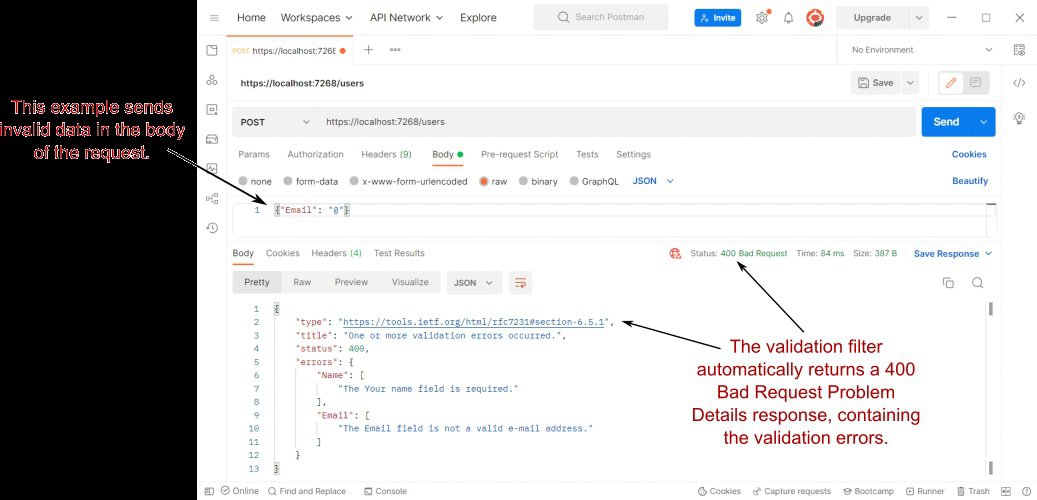